##  Análise de Dados - Dataset Gapminder
por Gabriela L. Paresqui

### Leitura dos Dados

In [582]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandera as pa
import seaborn as sns


In [583]:
#Lendo o arquivo e criando o dataframe
df = pd.read_csv('Gapminder.csv', error_bad_lines=False, sep=";")

In [584]:
#Exibindo as 10 primeiras linhas
df.head(10)


,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [585]:
#Renomeando as colunas para melhor entendimento do dataframe
df.columns = ['Pais', 'Continente','Ano', 'Expectativa de Vida', 'Populacao Total', 'PIB', ]

In [586]:
#Exibindo as 5 primeiras linhas 
df.head(5)

,Pais,Continente,Ano,Expectativa de Vida,Populacao Total,PIB
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [590]:
#Exibindo as 5 últimas linhas 
df.tail(5)

,Pais,Continente,Ano,Expectativa de Vida,Populacao Total,PIB
3307,Zimbabwe,Africa,1987,62.351,9216418,706.157306
3308,Zimbabwe,Africa,1992,60.377,10704340,693.420786
3309,Zimbabwe,Africa,1997,46.809,11404948,792.449960
3310,Zimbabwe,Africa,2002,39.989,11926563,672.038623
3311,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [591]:
#Exibindo a quantidade de linhas e colunas 
row, column = df.shape
print(f'Linhas: {row} Colunas: {column}')

Linhas: 3312 Colunas: 6


In [592]:
#Exibindo as principais informações sobre o dataframe e suas colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pais                 3312 non-null   object 
 1   Continente           3011 non-null   object 
 2   Ano                  3312 non-null   int64  
 3   Expectativa de Vida  3312 non-null   float64
 4   Populacao Total      3312 non-null   int64  
 5   PIB                  3312 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 155.4+ KB


### Validando os Dados

In [598]:
#Verificando se cada dado de cada coluna corresponde ao tipo de dado informado
schema = pa.DataFrameSchema(
    columns = {
        "Pais": pa.Column(pa.String),
        "Continente": pa.Column(pa.String, nullable=True),
        "Ano": pa.Column(pa.Int),
        "Expectativa de Vida": pa.Column(pa.Float),
        "Populacao Total": pa.Column(pa.Int),   
        "PIB": pa.Column(pa.Float)
    
    }
)

In [594]:
schema.validate(df)

,Pais,Continente,Ano,Expectativa de Vida,Populacao Total,PIB
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
3307,Zimbabwe,Africa,1987,62.351,9216418,706.157306
3308,Zimbabwe,Africa,1992,60.377,10704340,693.420786
3309,Zimbabwe,Africa,1997,46.809,11404948,792.449960
3310,Zimbabwe,Africa,2002,39.989,11926563,672.038623


### Tratando  Dados Ausentes

In [597]:
#Verificando quais colunas possuem dados ausentes
df.isna().sum()

Pais                     0
Continente             301
Ano                      0
Expectativa de Vida      0
Populacao Total          0
PIB                      0
dtype: int64

In [599]:
#Visualizando 10 amostras aleatórias dos dados nulos na coluna 'Continente'
df[df['Continente'].isnull()].sample(10)

,Pais,Continente,Ano,Expectativa de Vida,Populacao Total,PIB
196,Bahamas,NaN,1997,68.472,281577,20990.832470
1253,Haiti,NaN,1972,48.042,4698301,1654.456946
1895,Martinique,NaN,2002,78.783,422277,13561.809910
515,Canada,NaN,1965,71.790,20071104,15198.110090
92,Australia,NaN,1970,70.810,12660160,16273.142140
107,Australia,NaN,1985,75.460,15788300,21040.494600
1103,French Polynesia,NaN,1977,62.427,138156,16682.106820
120,Australia,NaN,1998,79.330,18768789,28169.153410
77,Australia,NaN,1955,70.170,9277087,10864.617740
2541,Sao Tome and Principe,NaN,2007,65.528,199579,1598.435089


In [600]:
#Preenchendo os dados nulos da coluna continente como dados 'Não Informado'
df.fillna(inplace=True, value={'Continente':'Nao Informado'} )

In [601]:
#Verificando os dados da coluna 'Continente', os missing values da coluna foram substituidos por 'Nao Informado'
df["Continente"].unique()


array(['Asia', 'Europe', 'Africa', 'Americas', 'Nao Informado', 'FSU',
       'Oceania'], dtype=object)

In [602]:
#Exibindo 10 linhas onde possuem o continente como 'Não Informado'
Nao_informado = df.loc[df["Continente"] == "Nao Informado"]
Nao_informado.head(10)

,Pais,Continente,Ano,Expectativa de Vida,Populacao Total,PIB
60,Armenia,Nao Informado,1992,68.663,3378331,1442.937796
61,Armenia,Nao Informado,1997,70.377,3059000,1791.347190
62,Armenia,Nao Informado,2002,71.403,3013818,2692.304039
63,Armenia,Nao Informado,2007,71.965,2971650,4942.543911
64,Aruba,Nao Informado,1972,70.941,59461,4939.758007
65,Aruba,Nao Informado,1977,71.830,59412,7390.359942
66,Aruba,Nao Informado,1982,74.116,61569,10874.914950
67,Aruba,Nao Informado,1987,74.494,65415,17674.338900
68,Aruba,Nao Informado,1992,74.108,67174,25120.549610
69,Aruba,Nao Informado,1997,73.011,68341,26483.668620


### Transformação dos Dados

In [603]:
#Verificando se há algum dado duplicado no dataframe
duplicados = df.duplicated().sum()
print(f'O dataframe possui {duplicados} dados duplicados.')

O dataframe possui 0 dados duplicados.


### Análise Exploratória 

In [604]:
#Exibindo as estatísticas descritivas, desvio padrão, média, mediana, quartis..
df.describe()

,Ano,Expectativa de Vida,Populacao Total,PIB
count,3312.000000,3312.000000,3.312000e+03,3312.000000
mean,1980.301630,65.246871,3.161489e+07,11317.115805
std,16.927294,11.768412,1.041193e+08,11369.142739
min,1950.000000,23.599000,5.941200e+04,241.165876
25%,1967.000000,58.337500,2.678572e+06,2514.625266
50%,1982.000000,69.610000,7.557218e+06,7838.505123
75%,1996.000000,73.657750,1.958522e+07,17357.879170
max,2007.000000,82.670000,1.318683e+09,113523.132900


In [646]:
#Países que possuem maior quantidade de dados informados no dataset
df['Pais'].value_counts()

Taiwan           58
Finland          58
Denmark          58
Netherlands      58
Japan            58
                 ..
Azerbaijan        4
Tajikistan        4
Martinique        1
Guadeloupe        1
French Guiana     1
Name: Pais, Length: 187, dtype: int64

In [606]:
#Exibindo o PIB Total
pib = df['PIB'].sum()
pib

37482287.5451553

In [607]:
#Exibindo a Populacao Total
pop_total = df['Populacao Total'].sum()
pop_total

104708518385

In [608]:
#Exibindo a quantidade de Países de cada Continente
df.groupby("Continente")["Pais"].nunique()


Continente
Africa           51
Americas         25
Asia             41
Europe           35
FSU               6
Nao Informado    26
Oceania           3
Name: Pais, dtype: int64

In [508]:
#Lista com o nome de todos os países presentes no dataset
df.Pais.unique()



array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'French Guiana', 'French Polynesia', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guadeloupe', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyan

In [509]:
#Total de países no Dataset
total_paises = df.Pais.nunique()
total_paises

187

In [609]:
#Exibindo o ano mais antigo do Dataset
ano_mais_antigo = df['Ano'].min()
ano_mais_antigo

1950

In [610]:
#Exibindo o ano mais recente do Dataset
ano_mais_recente = df['Ano'].max()
ano_mais_recente

2007

In [611]:
#Média de expectativa de vida para cada continente
df.groupby("Continente")["Expectativa de Vida"].mean()


Continente
Africa           48.518682
Americas         65.789711
Asia             62.242752
Europe           72.721644
FSU              68.800279
Nao Informado    69.216063
Oceania          70.396622
Name: Expectativa de Vida, dtype: float64

In [612]:
#Exibindo os 10 paises com os menores PIBs do dataframe
menor_pib = df.groupby('Pais').min().sort_values(by='PIB').head(10)
menor_pib

,Continente,Ano,Expectativa de Vida,Populacao Total,PIB
Pais,,,,,
"Congo, Dem. Rep.",Africa,1952,39.143,14100005,241.165876
Lesotho,Africa,1952,42.138,748747,298.846212
Guinea-Bissau,Africa,1952,32.500,580653,299.850319
Eritrea,Africa,1952,35.928,1438760,328.940557
Myanmar,Asia,1952,36.319,20092996,331.000000
Burundi,Africa,1952,39.031,2445618,339.296459
Ethiopia,Africa,1952,34.078,20860941,362.146280
Cambodia,Asia,1952,31.220,4693836,368.469286
Malawi,Africa,1952,36.256,2917802,369.165080


In [613]:
#Exibindo os 10 paises com os maiores PIBs do dataframe
maior_pib = df.groupby('Pais').max().sort_values(by='PIB',ascending=False).head(10)
maior_pib

,Continente,Ano,Expectativa de Vida,Populacao Total,PIB
Pais,,,,,
Kuwait,Asia,2007,77.588,2505559,113523.13290
Qatar,Asia,2007,75.588,907229,82010.97804
Brunei,Asia,2007,77.118,386511,72555.22854
Luxembourg,Europe,2005,79.570,468571,70014.00000
"Macao, China",Asia,2007,80.718,456989,54589.82024
United Arab Emirates,Asia,2007,78.672,2642566,53335.17575
Norway,Europe,2007,80.550,4627926,49357.19017
Singapore,Asia,2007,79.972,4553009,47143.17964
United States,Americas,2007,78.242,301139947,42951.65309


In [647]:
#Exibindo os 5 países da América que contém os menores PIBs
filtro = df.loc[df.Continente == 'Americas']

filtro.groupby(['Pais']).min().sort_values(by='PIB').head(5)

,Continente,Ano,Expectativa de Vida,Populacao Total,PIB
Pais,,,,,
Dominican Republic,Americas,1952,45.928,2491346,1397.717137
Paraguay,Americas,1952,62.649,1555876,1952.308701
Brazil,Americas,1952,50.917,56602560,2108.944355
Bolivia,Americas,1952,40.414,2883315,2127.686326
Colombia,Americas,1952,50.643,12350771,2144.115096


In [648]:
#Exibindo os 5 países da América que contém os maiores PIBs
filtro2 = df.loc[df.Continente == 'Americas']


filtro2.groupby(['Pais']).max().sort_values(by='PIB', ascending=False).head(5)

,Continente,Ano,Expectativa de Vida,Populacao Total,PIB
Pais,,,,,
United States,Americas,2007,78.242,301139947,42951.65309
Puerto Rico,Americas,2007,78.746,3942491,19328.70901
Trinidad and Tobago,Americas,2007,69.862,1191336,18008.50924
Chile,Americas,2007,78.553,16284741,13171.63885
Venezuela,Americas,2007,73.747,26084662,13143.95095


In [616]:
#Populacao total de cada Continente
total_continente = df.groupby("Continente")["Populacao Total"].sum()
total_continente

Continente
Africa            6189783739
Americas         17083924131
Asia             54551147698
Europe           19941358543
FSU               4263980917
Nao Informado     2503119723
Oceania            175203634
Name: Populacao Total, dtype: int64

In [649]:
#Exibindo a média de expectativa de vida de 5 paises da América do Sul
filtro2.groupby("Pais")["Expectativa de Vida"].mean().head(5)

Pais
Argentina    69.060417
Bolivia      52.504583
Brazil       62.239500
Chile        67.430917
Colombia     63.897750
Name: Expectativa de Vida, dtype: float64

### Visualização dos Dados

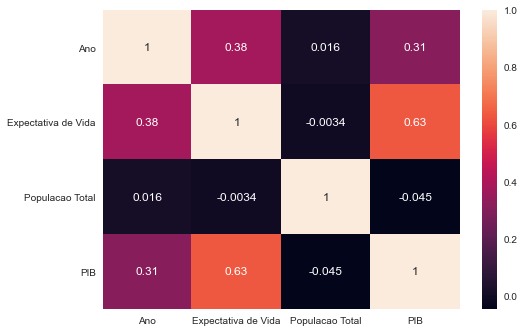

In [519]:

#Gerando um gráfico 'heatmap' dos dados da tabela 'Gapminder'
Corr = df[df.columns].corr()
sns.heatmap(Corr, annot=True);

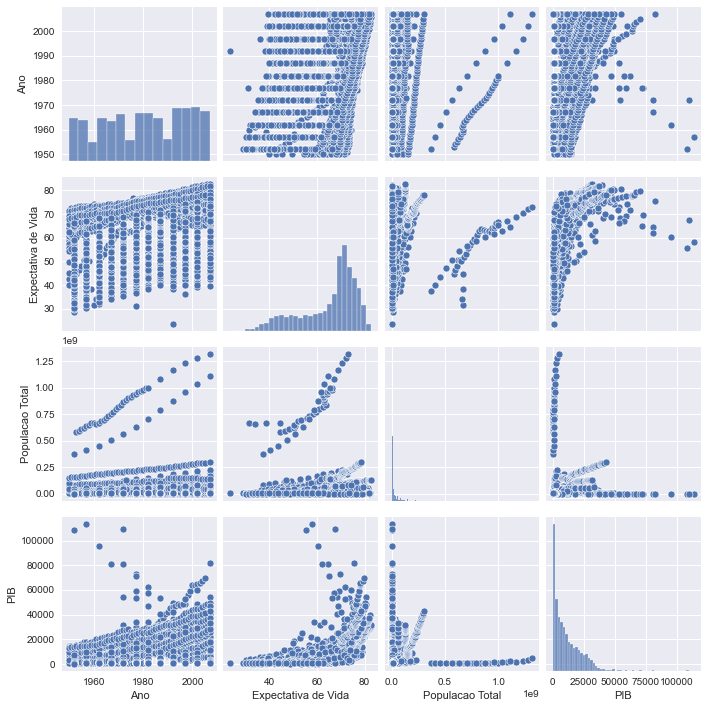

In [520]:
#Gerando múltiplos gráficos
sns.pairplot(df);


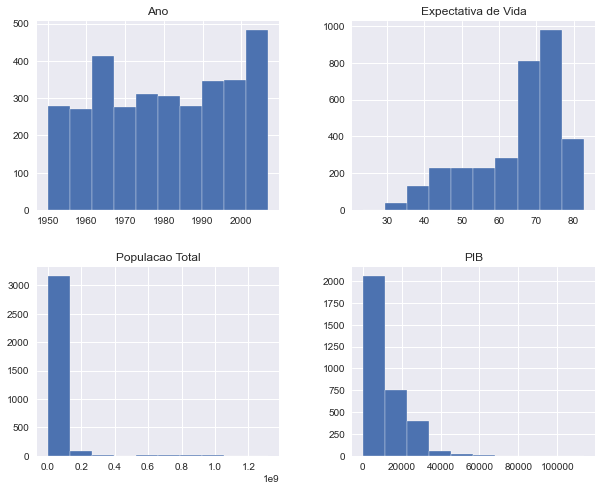

In [650]:
#Histograma
df.hist(figsize = (10,8));


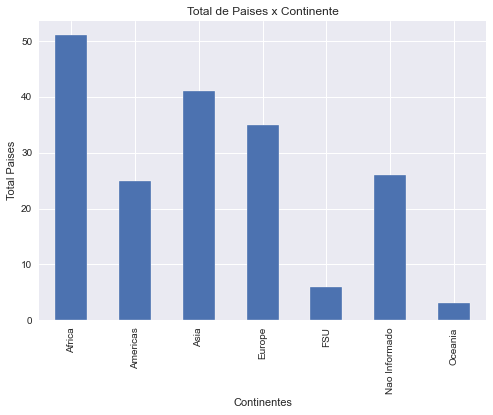

In [651]:
#Exibindo a quantidade de Países de cada Continente
df.groupby("Continente")["Pais"].nunique().plot.bar(title="Total de Paises x Continente")
plt.xlabel("Continentes")
plt.ylabel("Total Paises");

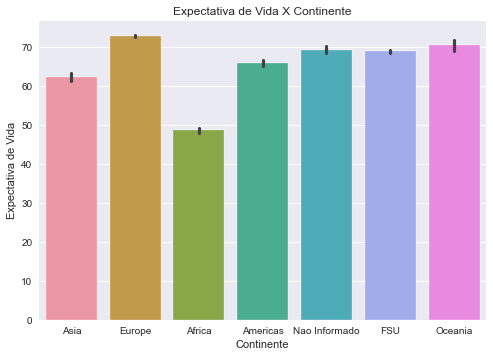

In [548]:
sns.barplot(data=df, x = 'Continente', y = 'Expectativa de Vida').set_title('Expectativa de Vida X Continente');



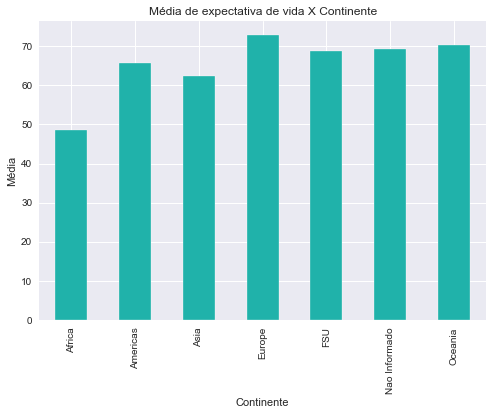

In [636]:
#Média de expectativa de vida para cada continente
df.groupby("Continente")["Expectativa de Vida"].mean().plot.bar(title="Média de expectativa de vida X Continente", color='lightseagreen')
plt.ylabel('Média');